<a href="https://colab.research.google.com/github/Void3604/MLlab/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Number of samples in each class:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Checking for null values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


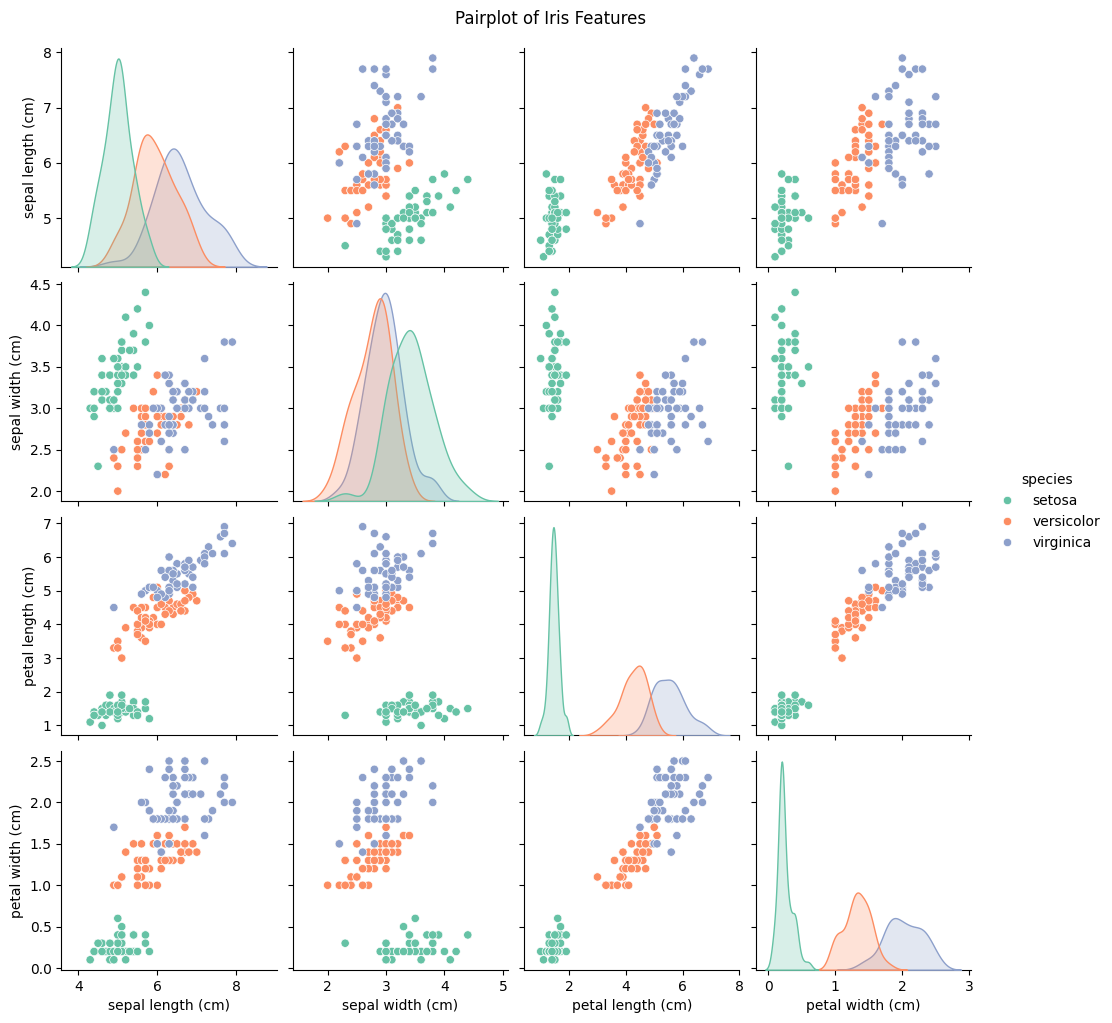

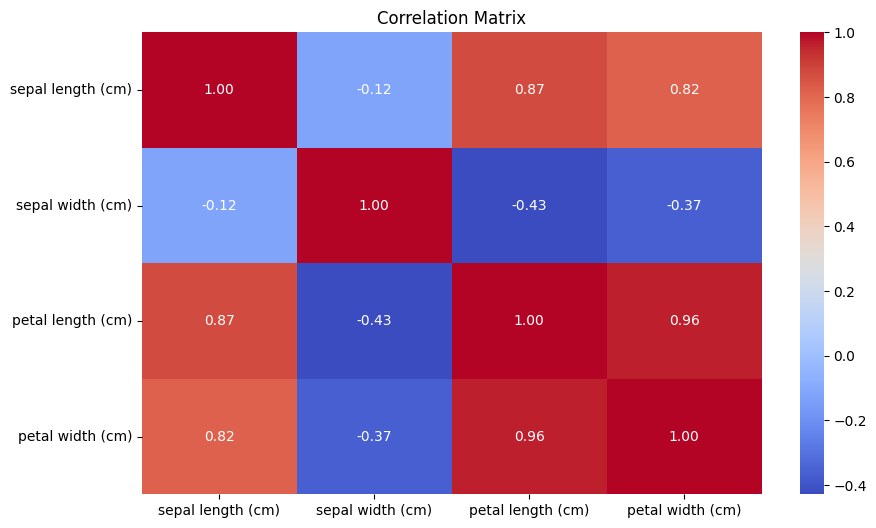


Covariance Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865  

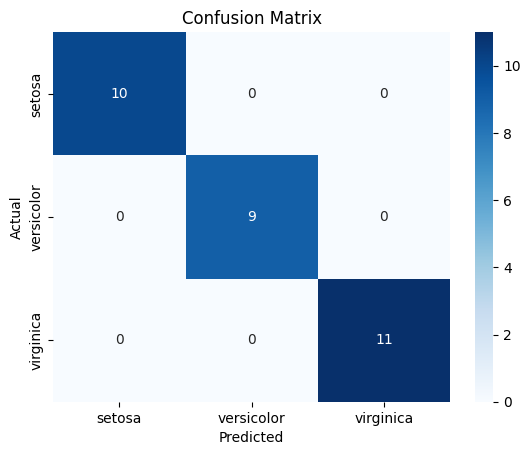

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Import dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Step 2: Display first 5 rows
print("First 5 rows of the dataset:")
print(iris_df.head())

# Step 3: Check the number of samples of each class in species
print("\nNumber of samples in each class:")
print(iris_df['species'].value_counts())

# Step 4: Check whether the dataset contains null values
print("\nChecking for null values:")
print(iris_df.isnull().sum())

# Step 5: Visualize the data in the form of graphs
def visualize_data(df):
    # Pairplot for feature visualization
    sns.pairplot(df, hue='species', diag_kind='kde', palette='Set2')
    plt.suptitle('Pairplot of Iris Features', y=1.02)
    plt.show()

    # Heatmap for correlation matrix
    plt.figure(figsize=(10, 6))
    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

visualize_data(iris_df)

# Step 6: Obtain covariance and correlation values
print("\nCovariance Matrix:")
numeric_df = iris_df.select_dtypes(include=[np.number])
print(numeric_df.cov())

print("\nCorrelation Matrix:")
print(numeric_df.corr())

# Step 7: Train and test the model
# Splitting the dataset into features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Converting target to numeric for Logistic Regression
y = y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Apply regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predicting on test data
y_pred = log_reg.predict(X_test)

# Step 9: Predict the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
